## **Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
import plotly.express as px

## **Read Data set**

In [2]:
df = pd.read_csv("air_traffic_data.csv")
# To display the top 5 rows
df.head(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [3]:
df.tail(5)                        # To display the botton 5 rows

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [4]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


In [5]:
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [6]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

## **Convert columns names into lower case**
## **And Replace spaces**

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['activity_period', 'operating_airline', 'operating_airline_iata_code',
       'published_airline', 'published_airline_iata_code', 'geo_summary',
       'geo_region', 'activity_type_code', 'price_category_code', 'terminal',
       'boarding_area', 'passenger_count', 'adjusted_activity_type_code',
       'adjusted_passenger_count', 'year', 'month'],
      dtype='object')

## **Dropping Irrelevant Columns**

In [8]:
df = df.drop(["published_airline_iata_code","activity_type_code","boarding_area","adjusted_activity_type_code","adjusted_passenger_count"], axis=1)
df.head(5)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,geo_summary,geo_region,price_category_code,terminal,passenger_count,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,5415,2005,July
3,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,35156,2005,July
4,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,34090,2005,July


## **Renames Columns**

In [9]:
df = df.rename(columns={"activity_period":"period",	"operating_airline":"airline","operating_airline_iata_code":"air_code","geo_summary":"region","price_category_code":"price","boarding_area":"boarding","passenger_count":"passengers"})
df.head(5)

,period,airline,air_code,published_airline,region,geo_region,price,terminal,passengers,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,5415,2005,July
3,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,35156,2005,July
4,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,34090,2005,July


In [10]:
df.shape

(15007, 11)

## **Droping Duplicates Values**

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (32, 11)


In [12]:
df.count()      # Used to count the number of rows

period               15007
airline              15007
air_code             14953
published_airline    15007
region               15007
geo_region           15007
price                15007
terminal             15007
passengers           15007
year                 15007
month                15007
dtype: int64

In [13]:
df.duplicated().sum()

32

In [14]:
df = df.drop_duplicates()
df.head(5)

,period,airline,air_code,published_airline,region,geo_region,price,terminal,passengers,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,5415,2005,July
3,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,35156,2005,July
4,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,34090,2005,July


In [15]:
df.duplicated().sum()

0

# **Dropping** **Nulls**

In [16]:
print(df.isnull().sum())

period                0
airline               0
air_code             38
published_airline     0
region                0
geo_region            0
price                 0
terminal              0
passengers            0
year                  0
month                 0
dtype: int64


In [17]:
df = df.dropna()    # Dropping the missing values.
df.count()

period               14937
airline              14937
air_code             14937
published_airline    14937
region               14937
geo_region           14937
price                14937
terminal             14937
passengers           14937
year                 14937
month                14937
dtype: int64

In [18]:
print(df.isnull().sum())   # After dropping the values

period               0
airline              0
air_code             0
published_airline    0
region               0
geo_region           0
price                0
terminal             0
passengers           0
year                 0
month                0
dtype: int64


## **Separate num and cat values**

In [19]:
num_col = df.select_dtypes(include=[np.number])
num_col

,period,passengers,year
0,200507,27271,2005
1,200507,29131,2005
2,200507,5415,2005
3,200507,35156,2005
4,200507,34090,2005
...,...,...,...
15002,201603,194636,2016
15003,201603,4189,2016
15004,201603,4693,2016
15005,201603,12313,2016


In [20]:
cat_col = df.select_dtypes(exclude=[np.number])
cat_col

,airline,air_code,published_airline,region,geo_region,price,terminal,month
0,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,July
1,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,July
2,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,July
3,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,July
4,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,July
...,...,...,...,...,...,...,...,...
15002,Virgin America,VX,Virgin America,Domestic,US,Low Fare,Terminal 2,March
15003,Virgin America,VX,Virgin America,International,Mexico,Low Fare,International,March
15004,Virgin America,VX,Virgin America,International,Mexico,Low Fare,Terminal 2,March
15005,Virgin Atlantic,VS,Virgin Atlantic,International,Europe,Other,International,March


# **Deleting Outliers**

In [21]:
for col in cat_col:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print('\n', "======================================", '\n')

airline
['ATA Airlines' 'Air Canada ' 'Air China' 'Air France' 'Air New Zealand'
 'AirTran Airways' 'Alaska Airlines' 'All Nippon Airways'
 'American Airlines' 'American Eagle Airlines' 'Asiana Airlines'
 'Atlantic Southeast Airlines' 'BelAir Airlines' 'British Airways'
 'Cathay Pacific' 'China Airlines' 'Delta Air Lines' 'EVA Airways'
 'Frontier Airlines' 'Hawaiian Airlines' 'Horizon Air ' 'Icelandair'
 'Independence Air' 'Japan Airlines' 'KLM Royal Dutch Airlines'
 'Korean Air Lines' 'Lufthansa German Airlines' 'Mesa Airlines'
 'Mexicana Airlines' 'Midwest Airlines' 'Northwest Airlines'
 'Philippine Airlines' 'Singapore Airlines' 'SkyWest Airlines'
 'Sun Country Airlines' 'TACA' 'US Airways' 'United Airlines'
 'United Airlines - Pre 07/01/2013' 'Virgin Atlantic' 'WestJet Airlines'
 'Miami Air International' 'Air Canada Jazz' 'Qantas Airways'
 'Ameriflight' 'Spirit Airlines' 'Xtra Airways'
 'Evergreen International Airlines' 'Aeromexico' 'JetBlue Airways '
 'ExpressJet Airlines' 'Sout

<AxesSubplot:xlabel='year'>

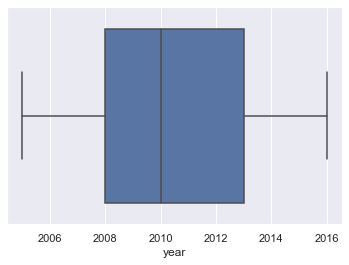

In [22]:
sns.boxplot(x=df["year"])

<AxesSubplot:xlabel='passengers'>

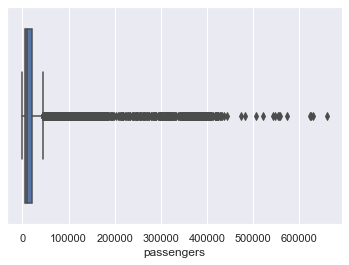

In [23]:
sns.boxplot(x=df['passengers'])

<AxesSubplot:xlabel='period'>

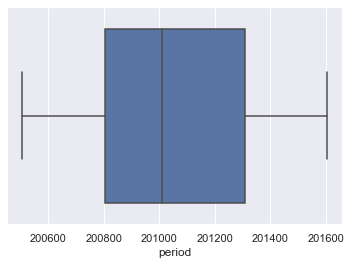

In [24]:
sns.boxplot(x=df['period'])

In [25]:
for i in num_col:
    fig = px.box(df, x = df[i])
    fig.update_traces(fillcolor = '#C9A26B')
    fig.show()

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

period          505.0
passengers    15847.0
year              5.0
dtype: float64


In [27]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\Aina Appa\AppData\Local\Temp\ipykernel_6220\4147643536.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(12512, 11)

# **Checking after deleting Outliers**

In [28]:
fig = px.box(df, x = df['period'])
fig.update_traces(fillcolor = '#C9A26B')

In [29]:
fig = px.box(df, x = df['passengers'])
fig.update_traces(fillcolor = '#C9A26B')

In [30]:
df.describe()

,period,passengers,year
count,12512.000000,12512.000000,12512.000000
mean,201039.325368,10410.908328,2010.327845
std,313.910747,8919.197585,3.143202
min,200507.000000,1.000000,2005.000000
25%,200802.000000,4769.750000,2008.000000
50%,201010.000000,7621.500000,2010.000000
75%,201307.000000,13335.750000,2013.000000
max,201603.000000,44983.000000,2016.000000


## 9. Plot different features against one another (scatter), against frequency (histogram)

**Histogram**

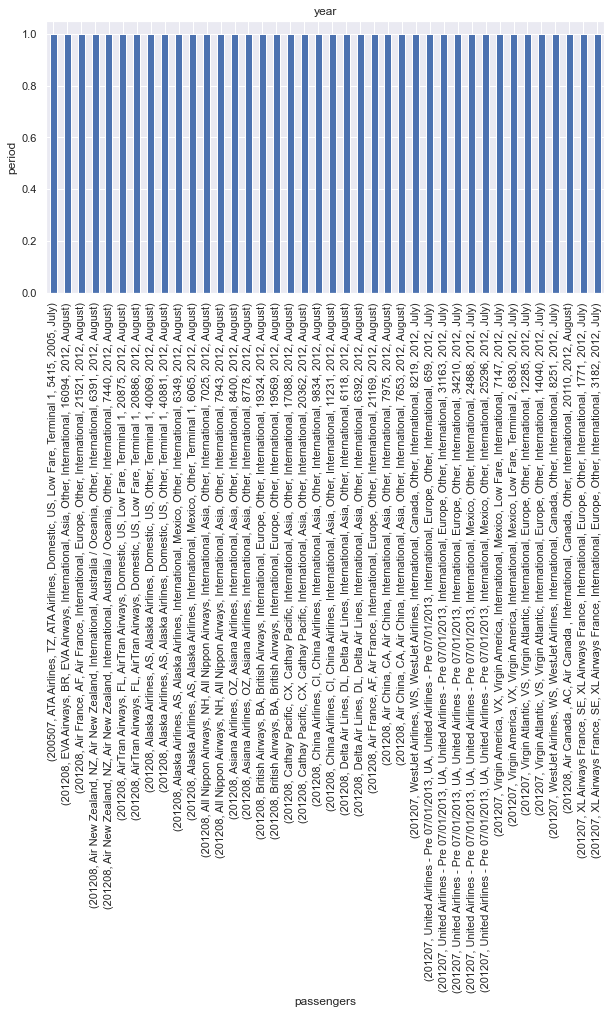

In [31]:
df.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("year")
plt.ylabel('period')
plt.xlabel('passengers');

the count on the y-axis represents the number of occurrences.
By visualizing the counts, you can understand the distribution and density of data within different bins or values in the column being analyzed.

In [32]:
color_palette = sns.color_palette("Set3")

for i in df:
    fig = px.histogram(df, x= i, color_discrete_sequence = color_palette)
    fig.show()

In [33]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    color_palette = sns.color_palette("Set3", num_unique_values)
    color_map = dict(zip(unique_values, color_palette))

    fig = px.histogram(df, x=column, color=df[column].map(color_map))
    fig.show()

In [34]:
#sns.heatmap(num_col, annot=True)


,period,passengers,year
period,1.000000,0.020594,0.999940
passengers,0.020594,1.000000,0.020417
year,0.999940,0.020417,1.000000


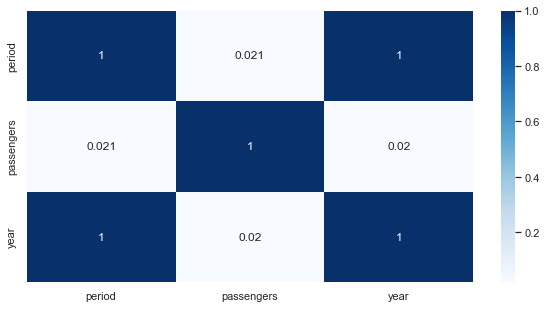

In [41]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="Blues",annot=True)
c

In [42]:
df.head()

,period,airline,air_code,published_airline,region,geo_region,price,terminal,passengers,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,Domestic,US,Low Fare,Terminal 1,5415,2005,July
3,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,35156,2005,July
4,200507,Air Canada,AC,Air Canada,International,Canada,Other,Terminal 1,34090,2005,July


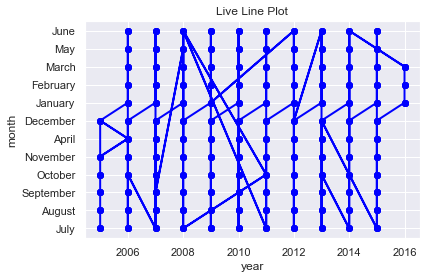

In [49]:
x = df['year']  # Time values for x-axis
y = df['month']  # Metric values for y-axis

# Set up the figure and axis
fig, ax = plt.subplots()

# Customize the plot appearance
ax.plot(x, y, color='blue', linewidth=2, linestyle='-', marker='o', markersize=5)

# Add labels and title
ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_title('Live Line Plot')

# Display the plot
plt.show()